**Daniel Goings<br>
dcgoings@buffalo.edu<br>
MTH337 Project 6 - Pi, Integrals, Monte-Carlo Methods, and Optimization using Swarming**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import time
import timeit

# Introduction

Throughout this project, we will explore the mathematical constant $\pi$ and estimating parameters of simple harmonic oscillations.

A large amount of our project will revolve around the different methods of calculating $\pi$ and estimating parameters. In the first half of our project, such methods used will include the trapezoidal integral method, Monte-Carlo method, and using pairs of coordinates painted against a squared with an inscribed circle. We will compare these methods for their speed and accuracy and determine which methods are superior and which fall short.

In the second half of our project, we will investigate simple harmonic oscillations and how we can estimate their parameters. We will extract given data, write error functions, and manipulate the data into a format that can be used and plotted in a graphical format. Using the plotted data, we will then identify sinusoidal characteristics and estimate values for amplitude and frequency of the given data. Finally, we will pass in our data and parameters into a particle swarm optimization algorithm in order to find a best fit curve for our data.

# PART 1: Calculating the value of $\pi$

### PROBLEM 1: We will try to calculate the value of $\pi$ using a few different methods. The first method is using definite integrals. The integral:

$$\int_{-1}^{1} \sqrt{1-x^2dx} = 
\frac{\pi}{2}$$

### Evaluate the integral above using the trapezoidal rule. Then calculate the value of $\pi$. 

In [2]:
def trapFunction(x=0.2):
    """
    Return the value of the square root of (1 - x ** 2).
    
    """
    return (1 - x**2) ** .5

In [3]:
def trapezoidalSolver(func, A, B, N, *funcArgs):
    """
    Returns the value of the definite integral of func with lower limit A and upper limit B.
    
    Keywords:
    func - integrand function
    A - lower limit of integral
    B - upper limit of integral
    N - number of points in the interval A to B
    I - value of integral (output of the function)
    
    """
    # Check that upper limit is higher than lower limit
    if (B < A):
        print("Enter a value B > A.")
        return 0
    
    # Check that N > 1
    
    if (N < 1):
        print("Enter N > 1")
        return 0
    
    # Create a set of point x_i between A and B. 
    # This means delta_X = (B-A)/N
    
    x = np.linspace(A,B,N)
    
    # Now I will evaluate function on all the elements of the x
    
    funcArray = func(x, *funcArgs)

    funcArray[0] = 0.5*funcArray[0]
    funcArray[N-1] = 0.5*funcArray[N-1]
    
    # Calculate sum of array elements
    I = np.sum(funcArray)
    
    # Multiply with delta_X
    I = I*(B-A)/N
    
    return I

In order to get a better idea of the accuracy of the trapezoidal solver, we can increase the number of iterations and compare the resulting values.

In [4]:
T100 = trapezoidalSolver(trapFunction,-1,1,100)
T1000 = trapezoidalSolver(trapFunction,-1,1,1000)
T10000 = trapezoidalSolver(trapFunction,-1,1,10000)
T100000 = trapezoidalSolver(trapFunction,-1,1,100000)
T1000000 = trapezoidalSolver(trapFunction,-1,1,1000000)
T10000000 = trapezoidalSolver(trapFunction,-1,1,10000000)

In [5]:
T100, T1000, T10000, T100000, T1000000, T10000000

(1.5534179294048953,
 1.5691729158636196,
 1.5706375839994522,
 1.5707805662398806,
 1.5707947543354799,
 1.5707961696626744)

As we can see above, with each increase in iterations by a magnitude of 10, our number appears to be converging on some number. It's worth noting that regardless of how many times we run these, for the same number of iterations you will not get a different answer. This is important to note since later on in the Monte-Carlo method, we will notice this is not the case. Since we know our trapezoidalSolver function is evaluating the given integral 

$$\int_{-1}^{1} \sqrt{1-x^2dx} = 
\frac{\pi}{2}$$ 

.. it is returning a value that is equal to $\frac{\pi}{2}$, and we can work with this information. Using our T variable with the largest number of iterations..

$$ T10000000 = \frac{\pi}{2}\,\, \text{and} \,\,T10000000 = 1.5707961696626744 $$

We can multiply both sides by 2.

$$ 1.5707961696626744\,\, x\,\, 2 = \pi$$

$$ 3.1415923393253488 = \pi $$

Or better yet, we can just multiply T by 2.

In [6]:
T100*2, T1000*2, T10000*2, T100000*2, T1000000*2, T10000000*2

(3.1068358588097906,
 3.1383458317272392,
 3.1412751679989044,
 3.1415611324797612,
 3.1415895086709598,
 3.1415923393253489)

As seen above, as our number of iterations increase, we converge towards the actual value of $\pi$

### PROBLEM 2: This integral can also be calculated by using a Monte-Carlo method. Remember, a Monte-Carlo method relies on random sampling and then averaging to estimate the right answer. Use the random number generation and Monte-Carlo integration method we discussed in class to calculate this integral.

In [7]:
def mcFunction(x=0.2):
    """
    Return the value of the square root of (1 - x ** 2).
    
    """
    return (1 - x**2) ** .5

In [8]:
def monteCarloArea(func, A, B, N, *funcargs):
    """
    
    """
    
    # Generate an array of random numbers between A and B
    
    if N < 1:
        print("number of samples must be greater than 1")
        return 0
    
    # Check that the interval lower and higher bounds are 
    # given properly
    
    if A > B:
        print("A must be less than B")
        return 0

    # Now generate a bunch of random numbers    
    x = np.random.uniform(A, B, round(N)) # round to make sure N is always integer
    
    # Now calculate the average function value in a loop
    
    F = func(x)
    
    # Use NumPy mean method for calculating the mean and multiply with B-A
    I = (B-A)*np.mean(F)
    
    return I

In [9]:
M100 = monteCarloArea(mcFunction,-1, 1,100)
M1000 = monteCarloArea(mcFunction,-1,1,1000)
M10000 = monteCarloArea(mcFunction,-1,1,10000)
M100000 = monteCarloArea(mcFunction,-1,1,100000)
M1000000 = monteCarloArea(mcFunction,-1,1,1000000)
M10000000 = monteCarloArea(mcFunction,-1,1,10000000)

In [10]:
M100, M1000, M10000, M100000, M1000000, M10000000

(1.6005405635906356,
 1.5858897822962057,
 1.5647881702220228,
 1.5718737437276862,
 1.5709862421066445,
 1.5709685927791619)

I ran the above lines a few times for these specific values. The randomness of Monte-Carlo shines right here, as we observe quite a bit of variation even though our number of iterations increase. Starting with 1.556, to 1.595, to 1.568, to 1.571, to 1.569, and finally to 1.570. Unlike the trapezoidal method, which got more accurate as the number of iterations increased, this is simply random but still near $\pi$, as shown below:

In [11]:
M100*2, M1000*2, M10000*2, M100000*2, M1000000*2, M10000000*2

(3.2010811271812711,
 3.1717795645924114,
 3.1295763404440455,
 3.1437474874553724,
 3.141972484213289,
 3.1419371855583238)

### PROBLEM 3: Which of the two calculations do you think is better? You would evaluate this using a variety of criteria like speed, convergence, precision, etc. Keep in mind that with the Monte-Carlo methods, you will get a slightly different answer every time. This is due to random sampling.

First, we can check for speed. We will do this in two ways just to confirm. The first method will utilize time.time(), subtract the start time from the end time. Our second method will simply use %%timeit, which will automatically execute several runs over several loops. For consistency and comparison purposes, we can run all of these on 100,000,000 iterations (Python is not even able to pick up time difference for calculations lower than 1000).

In [12]:
start = time.time()
trapezoidalSolver(trapFunction, -1, 1, 100000000)
print ("Time taken for the trapezoidal method over 100 million iterations was: %s seconds" % (time.time() - start))

Time taken for the trapezoidal method over 100 million iterations was: 2.1381819248199463 seconds


In [13]:
start2 = time.time()
monteCarloArea(mcFunction, -1, 1, 100000000)
print ("Time taken for the Monte-Carlo method over 100 million iterations was: %s seconds" % (time.time() - start2))

Time taken for the Monte-Carlo method over 100 million iterations was: 2.548431873321533 seconds


In [14]:
%%timeit 
trapezoidalSolver(trapFunction,-1,1,100000000)

2.14 s ± 15.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
%%timeit
monteCarloArea(mcFunction,-1,1,100000000)

2.59 s ± 86.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


As we can see with both timing methods, Monte-Carlo lags behind by approximately .3 - .4 seconds over 100 million iterations.

Now we can check for accuracy. Calculating the accuracy for the trapezoidal method is quite simple. We can take the known value of pi given in Numpy and use this to calculate a margin of error between our trapezoidalSolver function and the true value of pi (given by np.pi). For calculation reasons, we will use 10 million iterations instead for the comparison.

In [16]:
T10000000 = trapezoidalSolver(trapFunction,-1,1,10000000)
T10000000

1.5707961696626744

In [17]:
T10000000*2

3.1415923393253489

In [18]:
np.pi

3.141592653589793

In [19]:
errorOfTrap = np.pi - (T10000000*2)
errorOfTrap

3.1426444424553779e-07

Now, since we know this will never change for 10 million iterations, we can use this to advantage to find out how often it is more accurate than the Monte-Carlo method.

So here we will create a simple for loop that will run, let's say over 100 iterations. This first for loop will execute the MC method, check if it has less than a specific margin of error and return it. Better yet, we can check how it compares to the trapezoidal function (using our 'errorOfTrap' variable) and let us know if it found a more accurate value for $\pi$!

So we know that the margin of error for the trapezoidal method was .000000314, so let's give the Monte-Carlo method a little bit of leeway. We'll check if the margin of error is less than 3.0e-06 and if we're lucky, 3.0e-07!

In [20]:
count = 0
for x in range(0, 100):
#     print("Attempt %s" % x)
    M = monteCarloArea(mcFunction,-1,1,10000000)
    if abs(np.pi-(M*2)) < errorOfTrap :
        count +=1
        print("Attempt %s: %s is more accurate than the trapezoidal!" % (x, np.pi - (M*2)))
print("Finished. Final count = %s" % count)

Attempt 59: 1.51497553169e-07 is more accurate than the trapezoidal!
Finished. Final count = 1


Now obviously, there is a lot of randomness at play here. I ran this twice and had zero results before I finally got this one. This means over 100 loops at 10 million iterations, only one of the Monte-Carlo methods returned something even *close* to as accurate as the trapezoidal method for an equal number of iterations. 

It's worth mentioning that the lower the number of iterations for T and M, the faster it will go and the results may change. It's quite slow at 10 million, so let's see what happens if we drop down to 1 million iterations but run the for loop 1000 times..

In [21]:
T1000000 = trapezoidalSolver(trapFunction,-1,1,1000000)
T1000000*2

3.1415895086709598

In [22]:
errorOfTrap2 = np.pi - (T1000000*2)
errorOfTrap2

3.1449188333532163e-06

In [23]:
count = 0
for x in range(0, 1000):
#     print("Attempt %s" % x)
    M = monteCarloArea(mcFunction,-1,1,1000000)
    if abs(np.pi-(M*2)) < errorOfTrap2 :
        count +=1
        print("Attempt %s: %s and is more accurate than the trapezoidal!" % (x, np.pi - (M*2)))
print("Finished. Final count = %s" % count)

Attempt 369: -2.21300333436e-06 and is more accurate than the trapezoidal!
Attempt 463: 8.94478825231e-07 and is more accurate than the trapezoidal!
Attempt 620: -2.96233242114e-06 and is more accurate than the trapezoidal!
Attempt 805: -1.23588304479e-06 and is more accurate than the trapezoidal!
Finished. Final count = 4


Clearly, we can observe based on the above speed/timing methods and methods used to determine accuracy that the trapezoidal method is overwhelmingly the better method of the two for calculating $\pi$ with regards to speed and accuracy.

### PROBLEM 4: Another way to calculate $\pi$ is to consider a square of side 1. In this square, a quadrant of a circle with radius 1 can be inscribed. Generate pairs of radom numbers on the square. Each pair of random numbers can be considered to be the $(x, y)$ coordinates of that point on the square (Python generates random numbers in the interval [0,1)). Now, check which of these points fall within the circle. The ratio of the points within the circle to the total generated points must be the same as the ratio of the areas of the quarter circle to the square. From this ratio, calculate $\pi$. Try out different number of points. Try few hundreds, few thousands, tens of thousands, etc.

Below, we have two different ways of approaching this problem, both very similar. Doing some research on how to approach this problem, I was reminded that we can calculate whether a pair of coordinates are inside a circle within a square by calculating:

$$ x^2 + y^2 < r^2$$

If this holds true, then the point (x,y) is inside the circle. If this calculation returns false, then the point (x,y) is outside of the circle! [2]

So for our first method, we will create a random list of tuples with values between 0 and 1. the for loop will iterate through all pairs, checking if the above calculation is true. If so, we increment our tally and return it at the end. Obviously with more pairs, we increase our accuracy. However since this method is very similar to the Monte-Carlo, and we are pretty much "throwing paint at the wall", our results will be different each time, but should be more accurate with more iterations.

In [95]:
z = np.random.random_sample((10000,2))

In [96]:
insideCircle = 0
outsideCircle = 0

for x in range(0, len(z)):
    if (z[x][0]**2 + z[x][1]**2 < 1):
        insideCircle += 1
    else:
        outsideCircle +=1
        
print('# of points inside the circle: %s' % insideCircle)
print('# of points outside the circle: %s' % outsideCircle)

# of points inside the circle: 7869
# of points outside the circle: 2131


Now for this specific iteration, if we take the number of points (7869) over the total number of points (10000), we get .7869. If we multiply this by 4 since the ratio of the area of the circle to the area of the square is $\frac{\pi}{4}$, we get 3.1476. Not perfect by any means, but in the ballpark! With some simple trial and error, we can quickly determine the value we *want* is approximately 7850 to achieve a final $\pi$ value of 3.14

Below is another variation using a split list of x and y values, squared and summed. We can see that we actually end up with 7841! Of course it's still random, but close nonetheless!

In [127]:
x = np.random.rand(10000)
y = np.random.rand(10000)

xy = x**2 + y **2

inside = [i for i in xy if i < 1]
print(len(inside))

7841


So let's make things fair by increasing the sample size to 10 million like we did for the trapezoidal and MC methods.

In [97]:
z = np.random.random_sample((10000000,2))

insideCircle = 0
outsideCircle = 0

for x in range(0, len(z)):
    if (z[x][0]**2 + z[x][1]**2 < 1):
        insideCircle += 1
    else:
        outsideCircle +=1
        
print('# of points inside the circle: %s' % insideCircle)
print('# of points outside the circle: %s' % outsideCircle)

# of points inside the circle: 7852861
# of points outside the circle: 2147139


In [128]:
x = np.random.rand(10000000)
y = np.random.rand(10000000)

xy = x**2 + y **2

inside = [i for i in xy if i < 1]
print(len(inside))

7853478


Now we're getting somewhere! With both of the methods above, we returned 7852861 and 7853478 points. Putting them each over 10 million and multiplying by 4, we achieve an estimated value of 3.1411444 and 3.1413912, respectively. Not bad for randomly throwing paint at the wall! [3,4]

<img src="https://cdn-images-1.medium.com/max/1600/1*9WSgyJEqaUAWotOF6UND9w.gif">

# PART 2: Estimating parameters of simple harmonic oscillations

### PROBLEM 1: Write an error function for the simple harmonic oscillator. The function would take in the name of the data file, called sineData.txt, and read in the values of t and x into two arrays. It must also accept a set of values for beta (given as a 1D array).

In [72]:
from pso import *

In [73]:
data = np.loadtxt("sineData.txt", delimiter='\t', skiprows=3)
height = np.array([data[:,1]]).reshape(len(data), 1)
t = np.array([data[:,0]]).reshape(len(data), 1)

In [74]:
def objectiveSine(beta, *args):
    
    if len(t) == len(height):
        r = beta[0] * np.sin(beta[1]*t) - height
        r1 = r**2
        S = np.mean(r1)
        return S
    else:
        print("error - height array and t array don't have same length")
        return 0

### PROBLEM 3: You can import the data into your notebook outside of the error function, plot it and convince yourself that the data is indeed sinusoidal. Estimate what the values of $A$ and $\omega$ can be from the plot. It will behelpful for setting bounds of the parameter space when you use PSO.

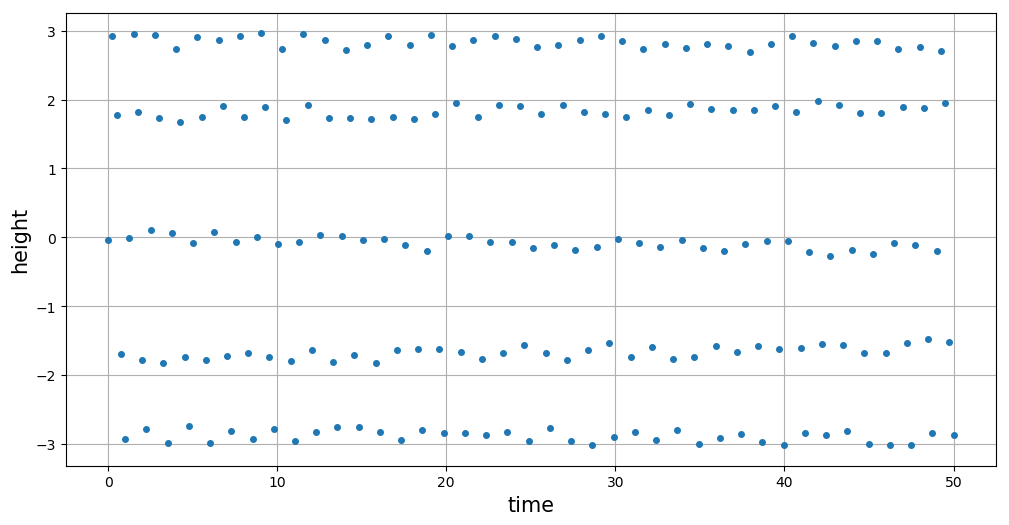

In [78]:
fig, axes = plt.subplots(figsize=(12, 6), dpi = 100)

axes.plot(t, height, '.', markersize=8)
axes.set_xlabel('time', fontsize=15)
axes.set_ylabel('height', fontsize=15)
axes.grid(True)

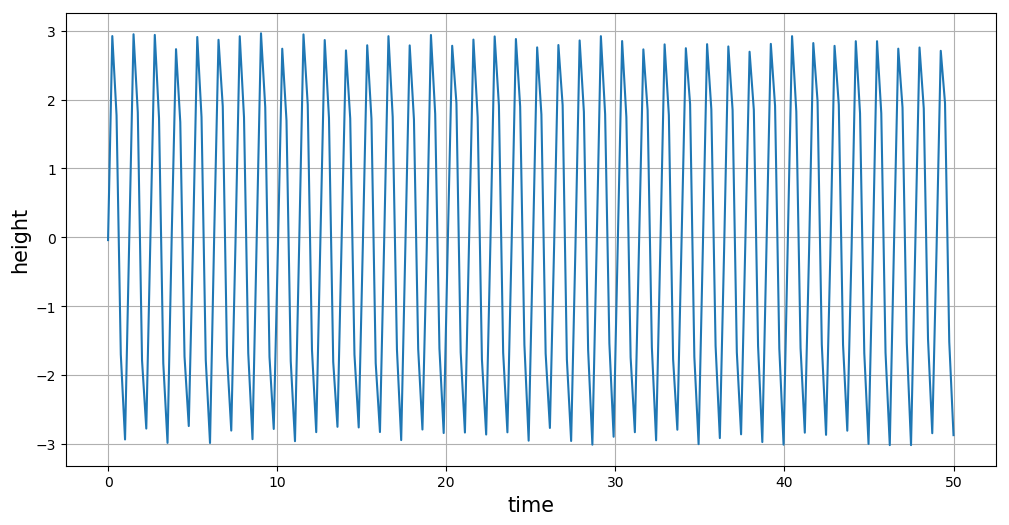

In [76]:
fig, axes = plt.subplots(figsize=(12, 6), dpi = 100)

axes.plot(t, height, markersize=8)
axes.set_xlabel('time', fontsize=15)
axes.set_ylabel('height', fontsize=15)
axes.grid(True)

We can observe that the plots above do have sinusoidal characteristics, such as being a continous and oscillating wave. However, there is noise within the graph, such as non-smooth waves and varying peaks and troughs, implying the amplitude is not just one value fits all.

As given in the project outline, the frequency is given by $\omega$ and the size of the oscillations is given by $A$. In other words, $\omega$ relates to how quickly the object goes from one side to the other and $A$ relates to how large the swings are per side. We can zoom in in order to get better estimates of these values.

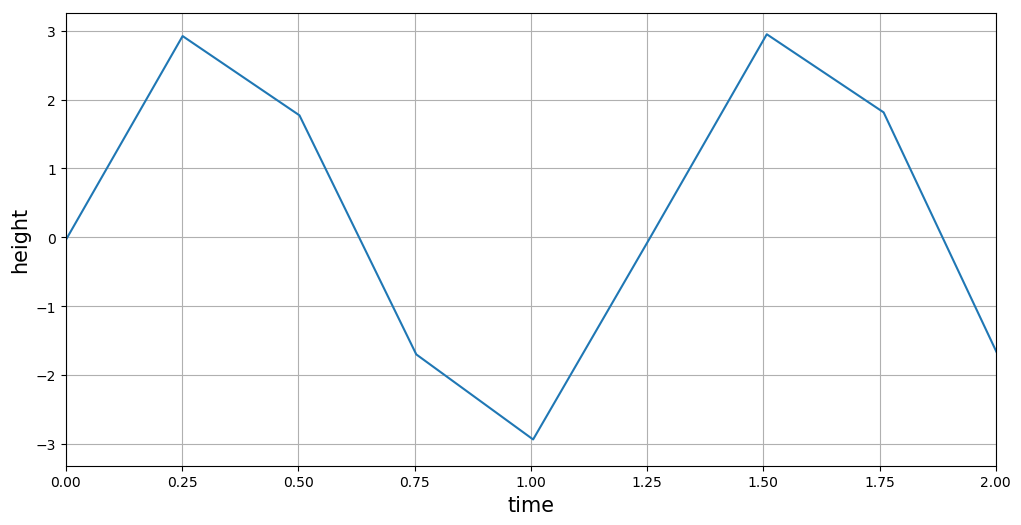

In [357]:
fig, axes = plt.subplots(figsize=(12, 6), dpi = 100)

axes.plot(t, height, markersize=8)
axes.set_xlabel('time', fontsize=15)
axes.set_ylabel('height', fontsize=15)
axes.set_xlim(0,2)
axes.grid(True)

Now zooming in for x-lims of (0, 3), we can see from height = 0, the amplitude swings, so A, are approximately 2.8 - 2.9. Alternatively, we can take the average of all the points where height is greater than 2.7, which we noticed was a pretty clean break in the data set when we plotted only the points two graphs ago.

In [84]:
heights = [i for i in height if i > 2.7]
np.mean(heights)

2.8352721610017353

In order to estimate $\omega$, we know that $\omega = 2\pi \,/\, T$. Observing the graph above and noting $T$ is the time between the two peaks, we can estimate $T = 1.25$. Plugging this into our equation $\omega = 2\pi \,/\, T$, we estimate $\omega = 5$.

Using these estimated values, we can then use them to assist our PSO solver.

In [90]:
lb = np.array([-3.25, 0])
ub = np.array([3.25, 20])
fileName = "sineData.txt"

best, bestList, full = pso(objectiveSine, fileName, numParticles = 100, iterations = 50, lowerLimit=lb, upperLimit=ub)

print("beta_0 = {} and beta_1 = {}".format(best[0], best[1]))

beta_0 = 2.967621483970027 and beta_1 = 4.999771742874574


Passing in our error function and its parameters for the PSO solver, we have matched up similar values for beta_0 and beta_1. Below, we plug those values into our earlier given equation and overlay it onto our earlier graph for objectiveSine.

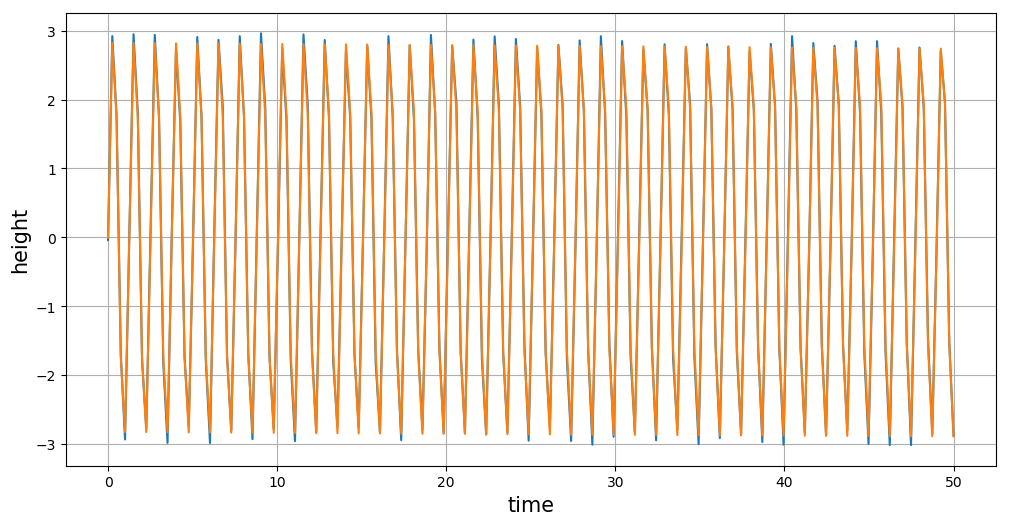

In [91]:
fig, axes = plt.subplots(figsize=(12, 6), dpi = 100)

axes.plot(t, height, markersize=8)
axes.plot(t, best[0]*np.sin(best[1]*t), markersize=8)
axes.set_xlabel('time', fontsize=15)
axes.set_ylabel('height', fontsize=15)
# axes.set_xlim(0,3)
axes.grid(True)

And zoomed in for clarity.

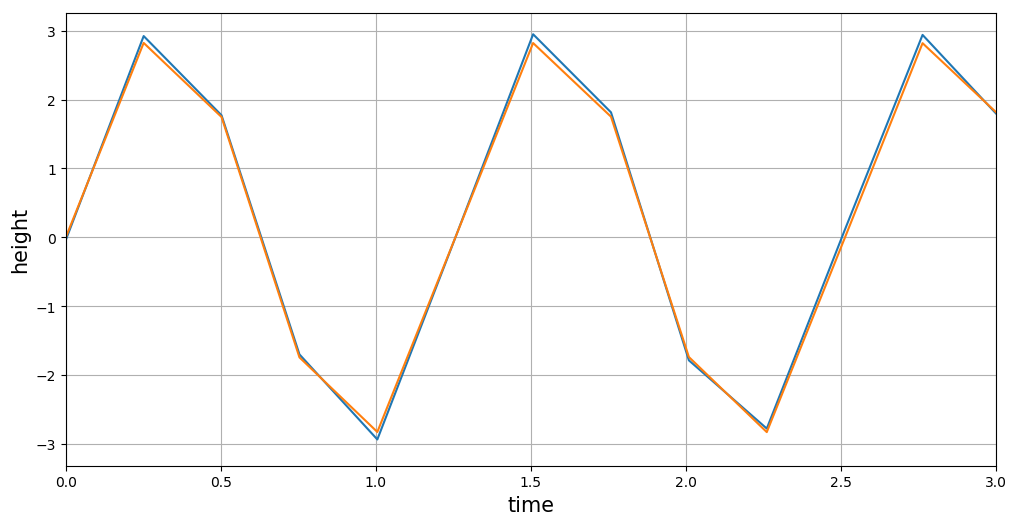

In [92]:
fig, axes = plt.subplots(figsize=(12, 6), dpi = 100)

axes.plot(t, height, markersize=8)
axes.plot(t, best[0]*np.sin(best[1]*t), markersize=8)
axes.set_xlabel('time', fontsize=15)
axes.set_ylabel('height', fontsize=15)
axes.set_xlim(0, 3)
axes.grid(True)

We can finally see that our values for $\beta_0$ and $\beta_1$ fit well against the data points generated earlier!

# CONCLUSION

Throughout this project, we successfully explored and calculated the value of $\pi$ using a variety of methods, such as the trapezoidal integral method, Monte-Carlo method, and pairs of coordinates. Further, we were able to evaluate these methods for speed and accuracy, proving the trapezoidal method is best in class amongst the three for it's consistency and speed over a large number of iterations, while the random sampling and splattering of the other two contributed to their downfall in comparison.

Additionally, we analyzed and extracted data from a given data set of simple harmonic oscillations and learned how to estimate its parameters. We successfully plotted the extracted data and used its graphical format to identify sinusoidal characteristics and how it showed "noise" within the plot points, followed by estimating its amplitude and frequency values.  Using these parameters, we were able to utilize a recently introduced particle swarm optimization algorithm that allowed us to use our estimated parameters to identify and plot a best fit curve to overlay on the given data and see how well the curves fit against each other. 

### SOURCES

[1] Class Notes / Professor's Notes/Emails

[2] http://www.eveandersson.com/pi/monte-carlo-circle

[3] https://www.geeksforgeeks.org/estimating-value-pi-using-monte-carlo/

[4] https://medium.freecodecamp.org/solve-the-unsolvable-with-monte-carlo-methods-294de03c80cd